In [12]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.document_loaders import TextLoader

loader = TextLoader("file.txt")
loader.load()



[Document(page_content='\n10 Academy Cohort A\nWeekly Challenge: Week 6\nPrecision RAG: Prompt Tuning For Building Enterprise Grade RAG Systems\n\nBusiness objective  \nPromptlyTech is an innovative e-business specializing in providing AI-driven solutions for optimizing the use of Language Models (LLMs) in various industries. The company aims to revolutionize how businesses interact with LLMs, making the technology more accessible, efficient, and effective. By addressing the challenges of prompt engineering, the company plays a pivotal role in enhancing decision-making, operational efficiency, and customer experience across various industries. PromptlyTech\'s solutions are designed to cater to the evolving needs of a digitally-driven business landscape, where speed and accuracy are key to staying competitive.\nThe company focuses on key services: Automatic Prompt Generation, Automatic Test Case Generation, and Prompt Testing and Ranking.\n1. Automatic Prompt Generation Service:\n    • 

In [3]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
def data_retriever(file, query):
    # Load the document, split it into chunks, embed each chunk, and load it into the vector store.
    raw_documents = TextLoader(file).load()
    text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=1000,
    chunk_overlap=50,
    length_function=len,
    is_separator_regex=False,
)
    documents = text_splitter.split_documents(raw_documents)
    
    # Assuming OpenAIEmbeddings is properly initialized and available as `embeddings`
    db = Chroma.from_documents(documents, OpenAIEmbeddings())
    
    query = query
    """Assigning score_threshold to 0.5 to retrieve document with above 
    50% of relevance score, and setting "K" == 5 to retrieve five chunks
    for a single query
    """
    retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.65, "k": 5}
)

    docs = retriever.get_relevant_documents(query)
    
    # Print each output individually
    for i in range(min(4, len(docs))):  # Avoid index out of range if there are less than 4 results
        print(docs[i].page_content)
    
    return None


In [1]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.vectorstores import Chroma

def data_retriever(file, query):
    # Load the document, split it into chunks, embed each chunk, and load it into the vector store.
    raw_documents = TextLoader(file).load()
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
    documents = text_splitter.split_documents(raw_documents)
    
    # Assuming OpenAIEmbeddings is properly initialized and available as `embeddings`
    db = Chroma.from_documents(documents, OpenAIEmbeddings())
    
    query = query
    docs = db.similarity_search(query)
    
    # Print each output individually
    for i in range(min(4, len(docs))):  # Avoid index out of range if there are less than 4 results
        print(docs[i].page_content)
    
    # Return None or any other value as needed
    return None


In [5]:
context = data_retriever('file.txt','brown')

Created a chunk of size 1004, which is longer than the specified 1000
Created a chunk of size 1203, which is longer than the specified 1000
Created a chunk of size 1025, which is longer than the specified 1000


Jessica was in charge of marketing at a Boston investment bank. This bank thought it understood startups, but over the next year, as she met friends of mine from the startup world, she was surprised how different reality was. And how colorful their stories were. So she decided to compile a book of interviews with startup founders.

When the bank had financial problems and she had to fire half her staff, she started looking for a new job. In early 2005 she interviewed for a marketing job at a Boston VC firm. It took them weeks to make up their minds, and during this time I started telling her about all the things that needed to be fixed about venture capital. They should make a larger number of smaller investments instead of a handful of giant ones, they should be funding younger, more technical founders instead of MBAs, they should let the founders remain as CEO, and so on.
Jessica was in charge of marketing at a Boston investment bank. This bank thought it understood startups, but ove

In [1]:
#splitting up using semantic chuncking
with open('file.txt') as file:
    essay = file.read()


In [2]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', essay)
print (f"{len(single_sentences_list)} senteneces were found")

744 senteneces were found


In [3]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]

In [4]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [5]:
sentences[5]

{'sentence': 'The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14.',
 'index': 5,
 'combined_sentence': 'They had hardly any plot, just characters with strong feelings, which I imagined made them deep. The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district\'s 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it.'}

In [6]:
from langchain_openai.embeddings import OpenAIEmbeddings
oaiembeds = OpenAIEmbeddings()

In [7]:
embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])

In [8]:
sentences[0]['combined_sentence']

"\t\t\n\nWhat I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn't write essays."

In [9]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [12]:
distances, sentences = calculate_cosine_distances(sentences)

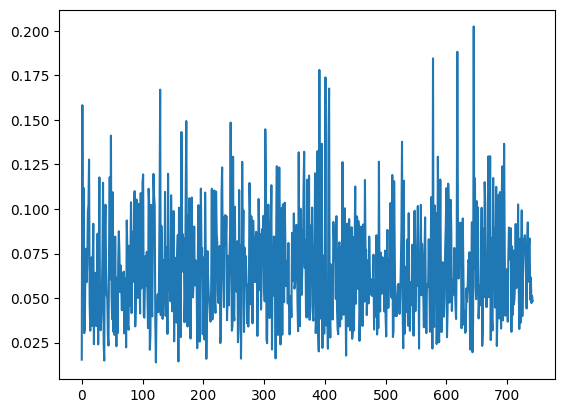

In [13]:
import matplotlib.pyplot as plt

plt.plot(distances);

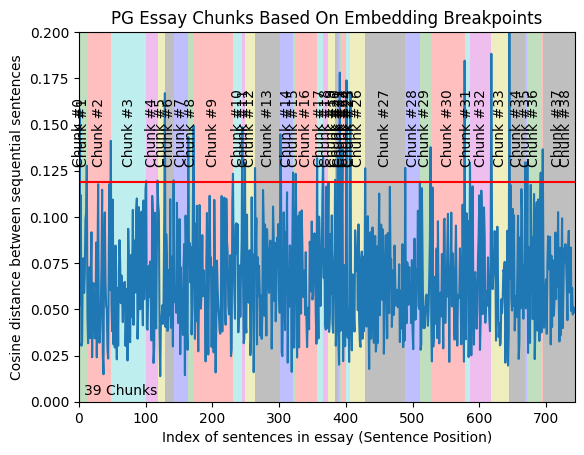

In [14]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

now we have both chunck and their respective embeddings, we can go now to LLM

In [15]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [16]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays.
...
What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays.


Chunk #1
I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagin
...
on to load the program into memory and run it. The result would ordinarily be to print something on the spectacularly loud printer. I was puzzled by the 1401. I couldn't figure out what to do with it.




In [17]:
from operator import itemgetter

from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

In [18]:
vectorstore = FAISS.from_texts(
    chunks, embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k" : 5}) # Specifying the value of "k" 


In [19]:
relevant_docs = retriever.get_relevant_documents("What are the challenges in evaluating Retrieval Augmented Generation pipelines?")
relevant_docs[0]

Document(page_content='I knew what I was going to do. For my undergraduate thesis, I reverse-engineered SHRDLU. My God did I love working on that program. It was a pleasing bit of code, but what made it even more exciting was my belief — hard to imagine now, but not unique in 1985 — that it was already climbing the lower slopes of intelligence. I had gotten into a program at Cornell that didn\'t make you choose a major. You could take whatever classes you liked, and choose whatever you liked to put on your degree. I of course chose "Artificial Intelligence." When I got the actual physical diploma, I was dismayed to find that the quotes had been included, which made them read as scare-quotes. At the time this bothered me, but now it seems amusingly accurate, for reasons I was about to discover. I applied to 3 grad schools: MIT and Yale, which were renowned for AI at the time, and Harvard, which I\'d visited because Rich Draves went there, and was also home to Bill Woods, who\'d invented

In [20]:
# retrieve the document
for doc in relevant_docs:
  print(doc.page_content)
  print('\n')

I knew what I was going to do. For my undergraduate thesis, I reverse-engineered SHRDLU. My God did I love working on that program. It was a pleasing bit of code, but what made it even more exciting was my belief — hard to imagine now, but not unique in 1985 — that it was already climbing the lower slopes of intelligence. I had gotten into a program at Cornell that didn't make you choose a major. You could take whatever classes you liked, and choose whatever you liked to put on your degree. I of course chose "Artificial Intelligence." When I got the actual physical diploma, I was dismayed to find that the quotes had been included, which made them read as scare-quotes. At the time this bothered me, but now it seems amusingly accurate, for reasons I was about to discover. I applied to 3 grad schools: MIT and Yale, which were renowned for AI at the time, and Harvard, which I'd visited because Rich Draves went there, and was also home to Bill Woods, who'd invented the type of parser I used

In [21]:
template = """<human>: Answer the question based only on the following context. If you cannot answer the question with the context, please respond with 'I don't know':

### CONTEXT
{context}

### QUESTION
Question: {question}

\n

<bot>:
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()

In [22]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [26]:
chain.invoke("what was the first program I wrote?")

"I don't know"

    Using the Dataset for RAG Evaluation

In [24]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

question_schema = ResponseSchema(
    name="question",
    description="a question about the context."
)

question_response_schemas = [
    question_schema,
]
question_output_parser = StructuredOutputParser.from_response_schemas(question_response_schemas)

format_instructions = question_output_parser.get_format_instructions()
question_generation_llm = ChatOpenAI(model="gpt-3.5-turbo-1106")

bare_prompt_template = "{content}"

bare_template = ChatPromptTemplate.from_template(template=bare_prompt_template)

In [25]:
qa_template = """\
You are a University Professor creating a test for advanced students. For each context, create a question that is specific to the context. Avoid creating generic or general questions.

question: a question about the context.

Format the output as JSON with the following keys:
question

context: {context}
"""

prompt_template = ChatPromptTemplate.from_template(template=qa_template)

messages = prompt_template.format_messages(
    context=docs[0],
    format_instructions=format_instructions
)

question_generation_chain = bare_template | question_generation_llm

response = question_generation_chain.invoke({"content" : messages})

output_dict = question_output_parser.parse(response.content)
for k, v in output_dict.items():
  print(k)
  print(v)

NameError: name 'docs' is not defined

In [45]:
import sys
from dotenv import load_dotenv
import os
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI

# Load API key from .env file
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

from operator import itemgetter

from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from back_end.chunk_semantically import semantic_retriever

chunks = semantic_retriever('file.txt')
vectorstore = FAISS.from_texts(
    chunks, embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k" : 5}) # Specifying the value of "k" 
template = """<human>: 

### CONTEXT
context: {context}

### QUESTION
Question: {question}

\n

<bot>:rate the relevance of retrieved context to the user question on scale of 1-10'

"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI(temperature=0.75)
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)
chain.invoke("what was the first program I wrote?")


'9'

In [120]:
template = """<human>: rate the relevance of retrieved context to the user {question} on scale of 1-10'
                       and return ONLY the rating value make sure to evaluate each 
                       question and context meticulously. I want the rating to be 
                       consitent for a given {question} each time prompted, make sure 
                       to rate them accurately. minimize the variation of the rating to
                       0, so make sure each time prompted you rate them accurately
                       you can use vector similarities beween the question and context
                       to avoid the variation:

the output MUST ALWAYS BE in the following format.

example:

    "The relevance of the retrieved context is rating value "



### CONTEXT
{context}

### QUESTION
Question: {question}

\n

<bot>:
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)
chain.invoke("what was the first program I wrote?")

'The relevance of the retrieved context is rating value 9.'

In [ ]:
template = """<human>: rate the relevance of retrieved context to the user {question} on scale of 1-10'
                       and return ONLY the rating value make sure to evaluate each 
                       question and context meticulously. I want the rating to be 
                       consitent for a given {question} each time prompted, make sure 
                       to rate them accurately. minimize the variation of the rating to
                       0, so make sure each time prompted you rate them accurately
                       you can use vector similarities beween the question and context
                       to avoid the variation:

the output MUST ALWAYS BE in the following format.

example:

    "The relevance of the retrieved context is rating value "



### CONTEXT
{context}

### QUESTION
Question: {question}

\n

<bot>:
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)
chain.invoke("what was the first program I wrote?")

In [ ]:
template = """<human>: craft efficient prompt based on {question}, 
                        make sure to generate very EFFECTIVE and 
                        PRACTICAL, the prompt should be clear and
                        consize and strategic as well. 


### CONTEXT
{context}

### QUESTION
Question: {question}

\n

<bot>:
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)
chain.invoke("what was the first program I wrote?")

Ecaluation using monte_carlo_eval & elo_eval

In [101]:
from evaluation.evaluation import monte_carlo_eval
from evaluation.evaluation import elo_eval
from evaluation.evaluation import elo_ratings_func

elo_rating=elo_eval(prompt)
elo_ratings_func(prompt,elo_rating)


TypeError: 'float' object is not subscriptable

In [97]:
monte_carlo_eval(prompt)

2.18

TypeError: elo_ratings_func() missing 1 required positional argument: 'elo_ratings'